In [29]:
import pandas as pd
import numpy as np

# 데이터수집: 웹 사이트 크롤링

서울시에서 제공하는 코로나 확진자 현황 정보를 pandas의 내장 함수인 read_html()을 사용해서 크롤링

In [49]:
url = 'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [50]:
# 판다스의 read_html을 통해 위 url에 있는 테이블 불러옵니다.
df=pd.read_html(url)

In [51]:
len(df)

50

In [52]:
# 구 별 확진자 현황
df[0]

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구
0,95,66,146,139,141,180,210,352,159,230,335,269,137
1,0,0,+2,0,0,+2,0,+2,0,+2,+1,0,0
2,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,기타
3,189,194,309,205,98,212,264,475,237,357,406,205,471
4,+1,0,+3,0,0,+1,0,0,+2,+2,+5,+1,+1


In [53]:
# 확진자 감염 경로
df[2]

,소계,해외유입,동대문구 에이스희망케어센터 관련,서울음악 교습 관련,강남구 럭키 사우나 관련,영등포구 가족 관련,송파구 소재 건설현장,송파구 소재 병원 관련,강남구 헬스장 관련,제주도 지인 모임 관련,...,송파구 잠언 의료기,강남구 CJ텔레닉스 관련,은평구 방문교사 관련,용인시 동문골프 모임 관련,강남 서초 지인 모임,수도권 지인 모임 관련,도봉구 다나 병원,타 시·도 확진자 접촉자,기타,감염경로 조사중
0,6081,460,13,17,35,4,10,14,18,5,...,10,21,7,25,27,5,68,266,4043,1029


In [54]:
# 확진자 정보 테이블 
df[3]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6081,26705,11.01.,도봉구,-,기타 확진자 접촉,NaN
1,6080,26717,11.01.,강동구,-,서울음악 교습 관련,NaN
2,6079,26698,11.01.,서초구,-,기타 확진자 접촉,NaN
3,6078,26702,11.01.,서초구,-,타시도 확진자 접촉,NaN
4,6077,26684,11.01.,용산구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
6076,5,9,1.31.,성북구,-,#5 접촉,퇴원
6077,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
6078,3,6,1.30.,종로구,-,#3 접촉,퇴원
6079,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [55]:
# 마지막 확진일을 파일명에 써주기 위해 . 을 _로 변경합니다.
data=df[3]
last_day=data.loc[0,'확진일']
last_day=last_day.replace('.','_')[:-1]

In [56]:
#파일명 만들어 줍니다.
file_name = f'data/covid19_crawl_{last_day}.csv'
file_name

'data/covid19_crawl_11_01.csv'

In [57]:
# 파일 csv로 저장
data.to_csv(file_name,index=False)

In [58]:
# 읽어와서 확인하기
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6081,26705,11.01.,도봉구,-,기타 확진자 접촉,NaN
1,6080,26717,11.01.,강동구,-,서울음악 교습 관련,NaN
2,6079,26698,11.01.,서초구,-,기타 확진자 접촉,NaN
3,6078,26702,11.01.,서초구,-,타시도 확진자 접촉,NaN
4,6077,26684,11.01.,용산구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
6076,5,9,1.31.,성북구,-,#5 접촉,퇴원
6077,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
6078,3,6,1.30.,종로구,-,#3 접촉,퇴원
6079,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


# 시각화 준비


In [133]:
import matplotlib.pyplot as plt

# mac 한글 폰트 설정
plt.rc('font',family='AppleGothic')
# font size
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
# 마이너스 값 깨지는 것 방지
plt.rc('axes',unicode_minus = False)
# 스타일 적용
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

# retina 디스플레이 지원되는 환경에서 시각화 폰트 선명하게 보기
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 확진일 분석

## Type 변경: object -> datetime

In [59]:
data['확진일']

0       11.01.
1       11.01.
2       11.01.
3       11.01.
4       11.01.
         ...  
6076     1.31.
6077     1.30.
6078     1.30.
6079     1.30.
6080     1.24.
Name: 확진일, Length: 6081, dtype: object

In [64]:
data['확진일']=pd.to_datetime("2020-"+data["확진일"].str.replace(".","-"))
data['확진일']

0      2020-11-01
1      2020-11-01
2      2020-11-01
3      2020-11-01
4      2020-11-01
          ...    
6076   2020-01-31
6077   2020-01-30
6078   2020-01-30
6079   2020-01-30
6080   2020-01-24
Name: 확진일, Length: 6081, dtype: datetime64[ns]

## 날짜에서 월, 주차, 요일 추출

In [66]:
data['월'] = data['확진일'].dt.month
data['주차'] = data['확진일'].dt.week

In [78]:
weekday = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
data['요일']=data['확진일'].dt.weekday.map(weekday)

In [93]:
data[['확진일','월','주차','요일']].head()

,확진일,월,주차,요일
0,2020-11-01,11,44,일
1,2020-11-01,11,44,일
2,2020-11-01,11,44,일
3,2020-11-01,11,44,일
4,2020-11-01,11,44,일


## 날짜에서 %m-%d 형태 추출하기

In [101]:
data['확진일2']=data['확진일'].astype(str).apply(lambda x:x[-5:])
data['확진일2']

0       11-01
1       11-01
2       11-01
3       11-01
4       11-01
        ...  
6076    01-31
6077    01-30
6078    01-30
6079    01-30
6080    01-24
Name: 확진일2, Length: 6081, dtype: object

## 일자 별 확진자 수: 선그래프 

- axhline: 비교선
- .text: 그래프위에 값 넣어주기

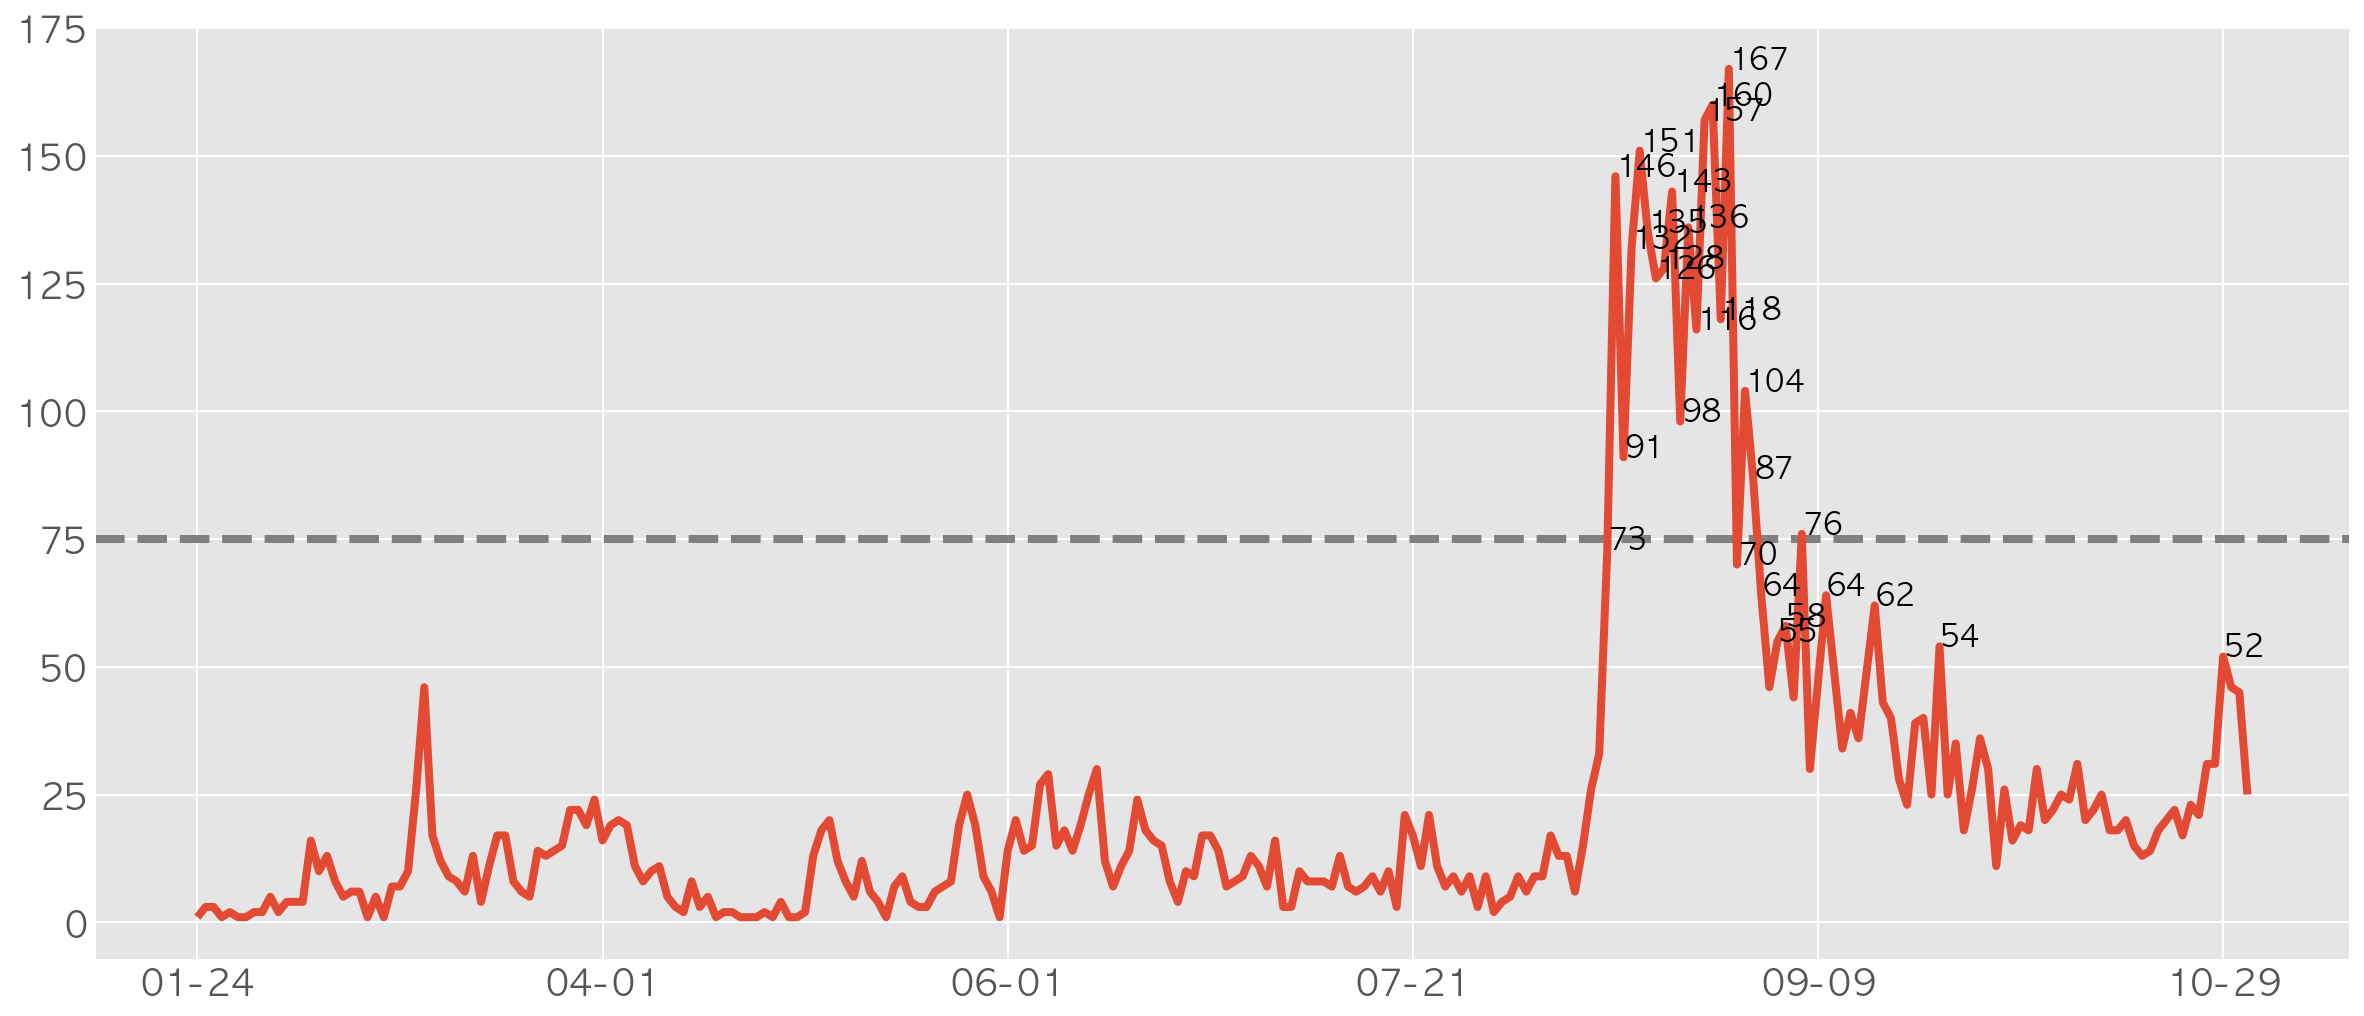

In [134]:
# x축이 날짜타입이 아니라서  sort_index()함수 사용 해서 정렬

# 특정 값 비교선 그려주기: 75
plt.axhline(75, color ='gray', linestyle ='--')
#plt.axhline(75, color ='gray', linestyle =':')

# 일자 별 확진자 line
day_count = data['확진일2'].value_counts().sort_index()
g = day_count.plot(figsize=(18,8))

# 선그래프 위에 값 표시하기
for i in range(len(day_count)):
    num = day_count.iloc[i]
    # 확진자 수 50명 넘을때만 표시하기
    if num > 50:
        g.text(x=i,y=num,s=num,size=15)

## 확진자 많이 나온 날 & 감염경로

확진자 많이 나온날 top10 중에 가장 빠른 날짜는 8월 15일이다.
8월 15일 약 2주뒤인 29일 가장 많은 확진자 수를 찍고 점차 감소했다.
8월 15일 광화문에서 대규모 집회 한 것이 큰 요인이었다.

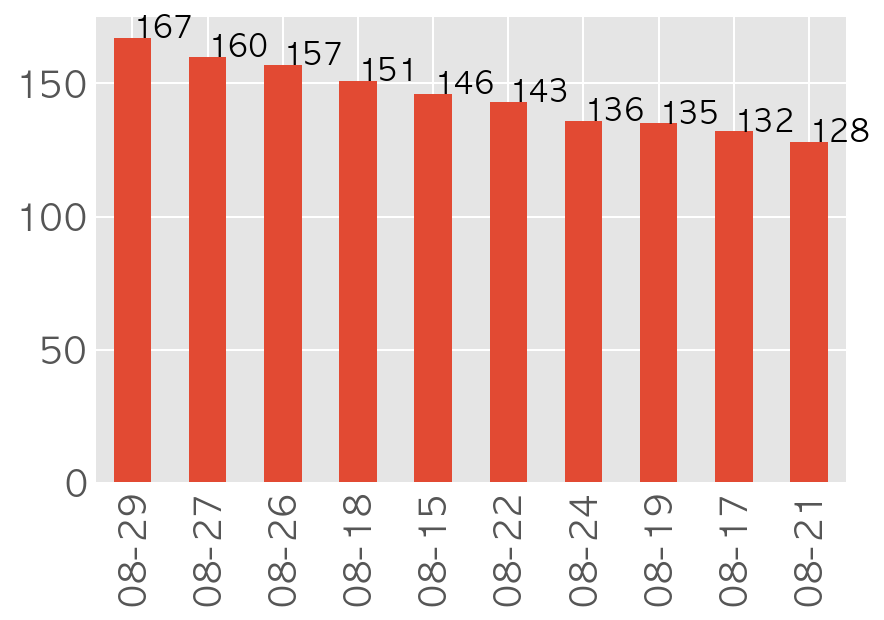

In [146]:
top10=data['확진일2'].value_counts().head(10)
g=top10.plot.bar()
for i in range(len(top10)):
    num = top10.iloc[i]
    g.text(x=i,y=num,s=num,size=15)

8월 15일 집회 이후 약 2주간 발생한 확진자들의 감염 경로가 정말 집회때문인지 확인해보자

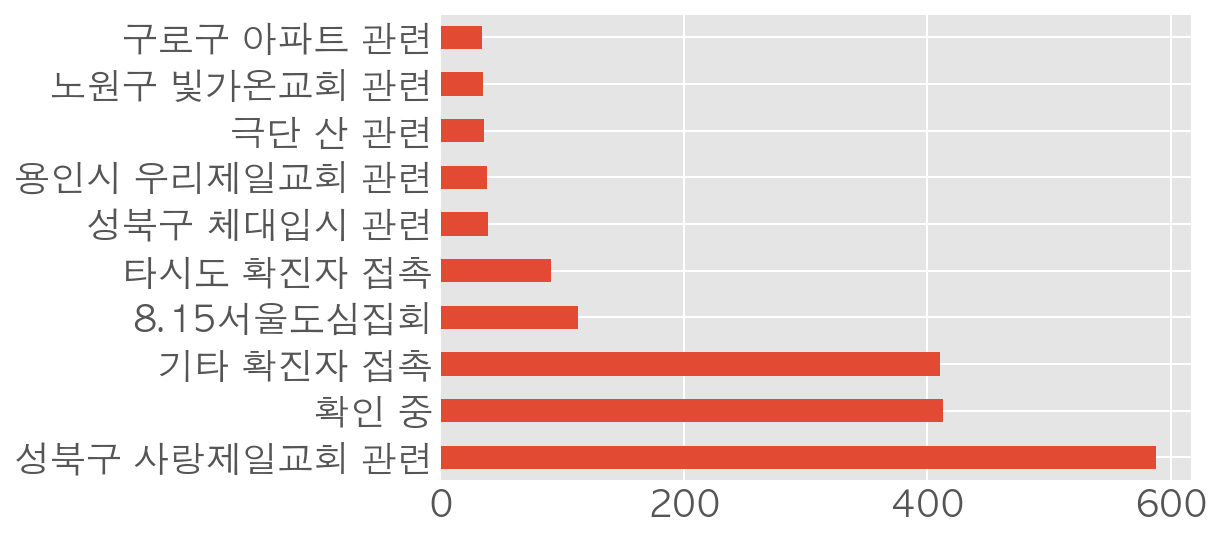

In [136]:
# 8월 15일 ~ 8월 31일 접촉력 파악
d815_831=data[(data['확진일2'] >= '08-15') & (data['확진일2'] < '09-01')]
d815_831['접촉력'].value_counts().head(10).plot.barh()

성북구 사랑제일교회 전광훈 목사는 815 집회 주도자중 한명인데, 이때 참여한 교회 관련 사람들의 확진이 압도적으로 많은 것을 알 수 있다.

확인중 413명은 확인이 안된 것인지, 데이터가 업데이트가 안된 것인지 알 수 없다.

## 최근 2주 데이터 확인하기

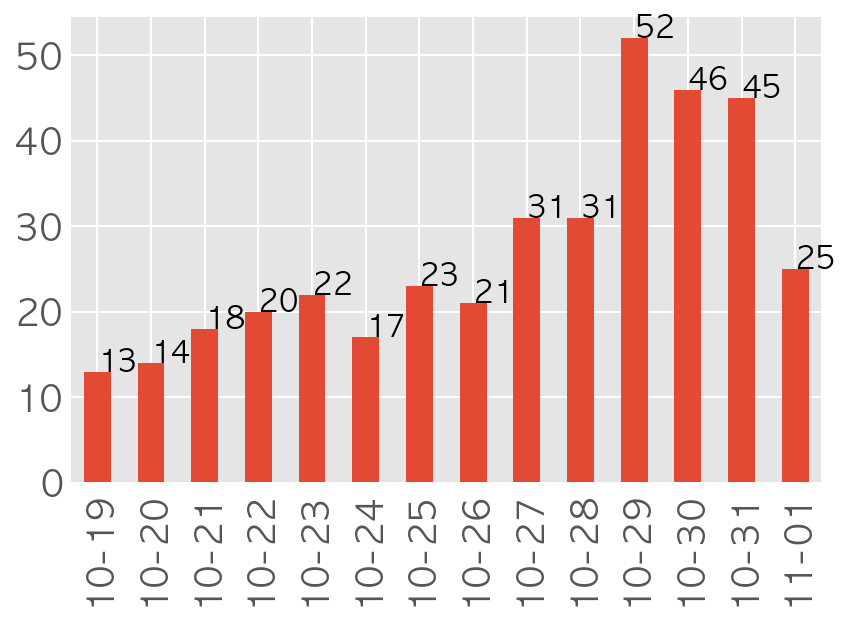

In [154]:
# 일 별 확진자 수
before14=day_count[-14:]
g=before14.plot.bar()
for i in range(len(before14)):
    num = before14.iloc[i]
    g.text(x=i,y=num,s=num, size=15)

In [155]:
d2=data[(data['확진일2'] >= '10-19') & (data['확진일2'] < '11-02')]

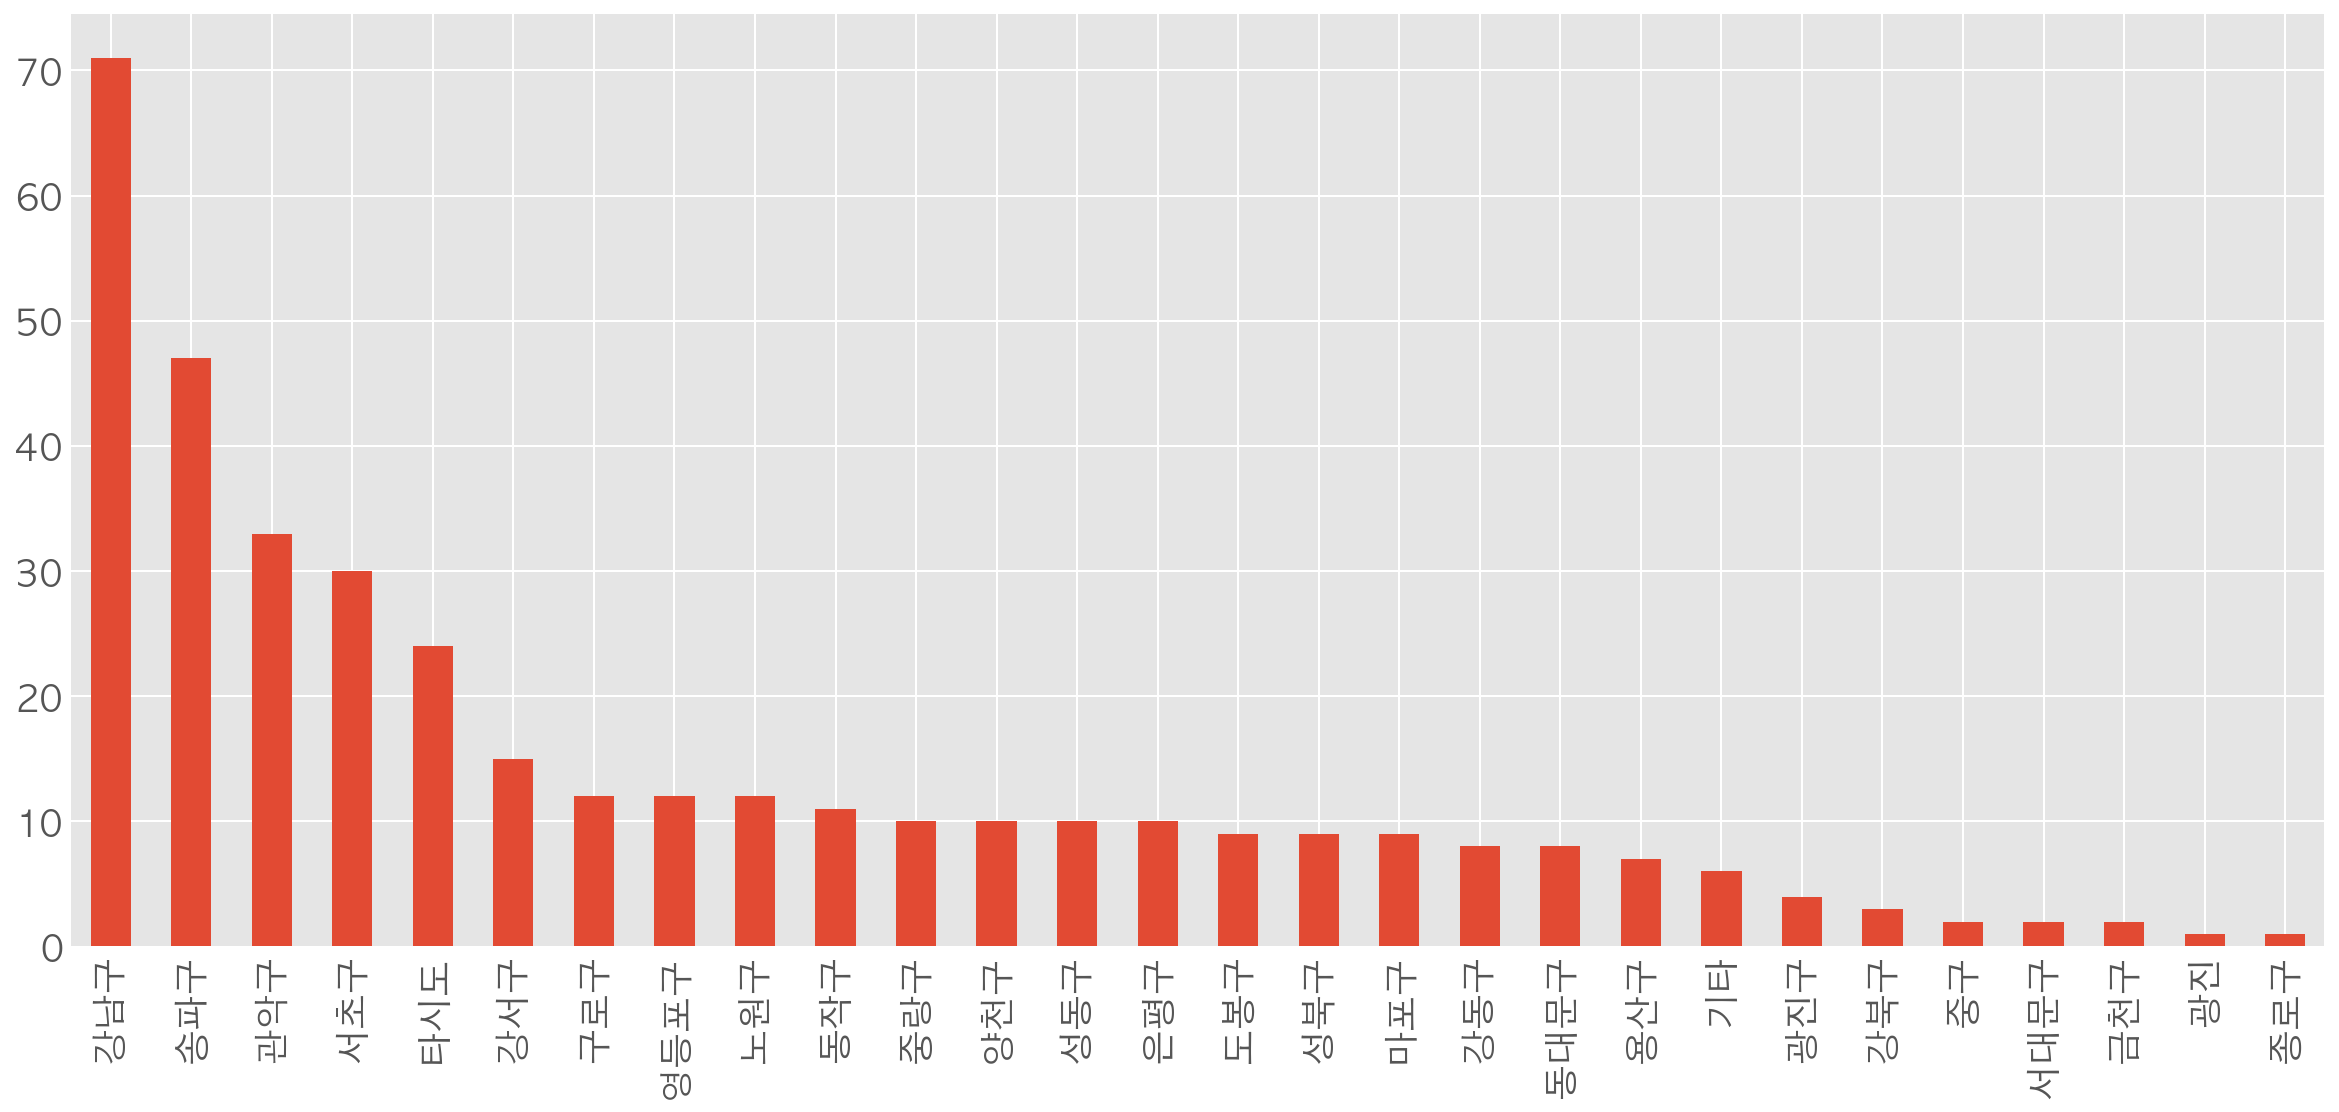

In [158]:
# 구 별 확진자 수
d2['거주지'].value_counts().plot.bar(figsize=(18,8))

In [161]:
# 접촉력 확인
d2['접촉력'].value_counts().head(15)

감염경로 조사중                57
기타 확진자 접촉               42
강남구 럭키사우나 관련            35
용인시 동문골프 모임             25
강남서초 지인모임               21
강남구 헬스장 관련              18
서울음악 교습 관련              17
타시도 확진자 접촉              15
송파구 소재 병원관련             14
해외 유입                   13
관악구 삼모스포렉스Ⅱ             12
구로구 가족관련                11
영등포구 가족관련[송파구소재건설현장)     9
동대문구 노인요양시설              8
기타확진자 접촉                 8
Name: 접촉력, dtype: int64

아직 조사중인 케이스가 57건으로 제일 많고, 기타 확진자 접촉으로 분류되는 것이 그 다음으로 많다.  
그 외에는 **강남구 럭키사우나 관련**, **용인시 동문골프 모임**, **강남서초 지인모임**, **강남구 헬스장 관련** 등이 상위권을 차지하고 있다.  
주로 사람들이 밀접하게 많이 모이는 장소나, 대규모 모임은 아직 조심해야겠다.

## 월 별 확진자 수: 막대 그래프

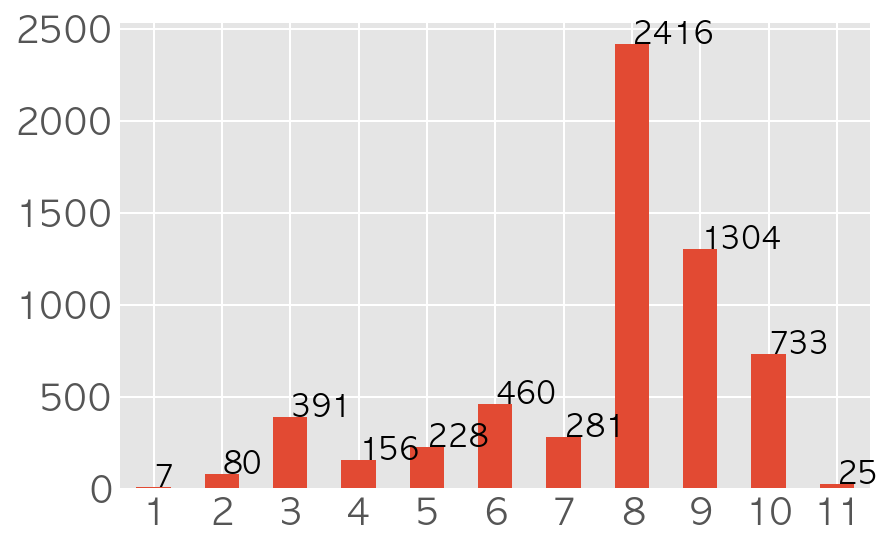

In [167]:
month=data['월'].value_counts().sort_index()
g=month.plot.bar(rot=0)
for i in range(len(month)):
    num = month.iloc[i]
    g.text(x=i,y=num,s=num,size=15)

3월 구로구 콜센터 등 집단감염 시작되었다가 사회적 거리두기 시행등 적극적인 감염 방지 대책으로 4월에 156명으로 감소했었다.  
5월에 이태원발 집단감염 다시 유행하고, 8월이전까진 6월이 가장 감염자가 많았다.  
8.15 집회가 이전의 그 어떤 집단감염보다도 심각했음을 알 수 있다.
사회적 거리두기 2.5단계 시행으로 점차 확진자가 감소했으나, 아직도 이전보다 매우 높은 확진자가 발생하고 있다.

## 주 별 확진자 수: 막대그래프

- 8월 15일은 33주차에 포함됨.
- 8월 17일 부터 34주차

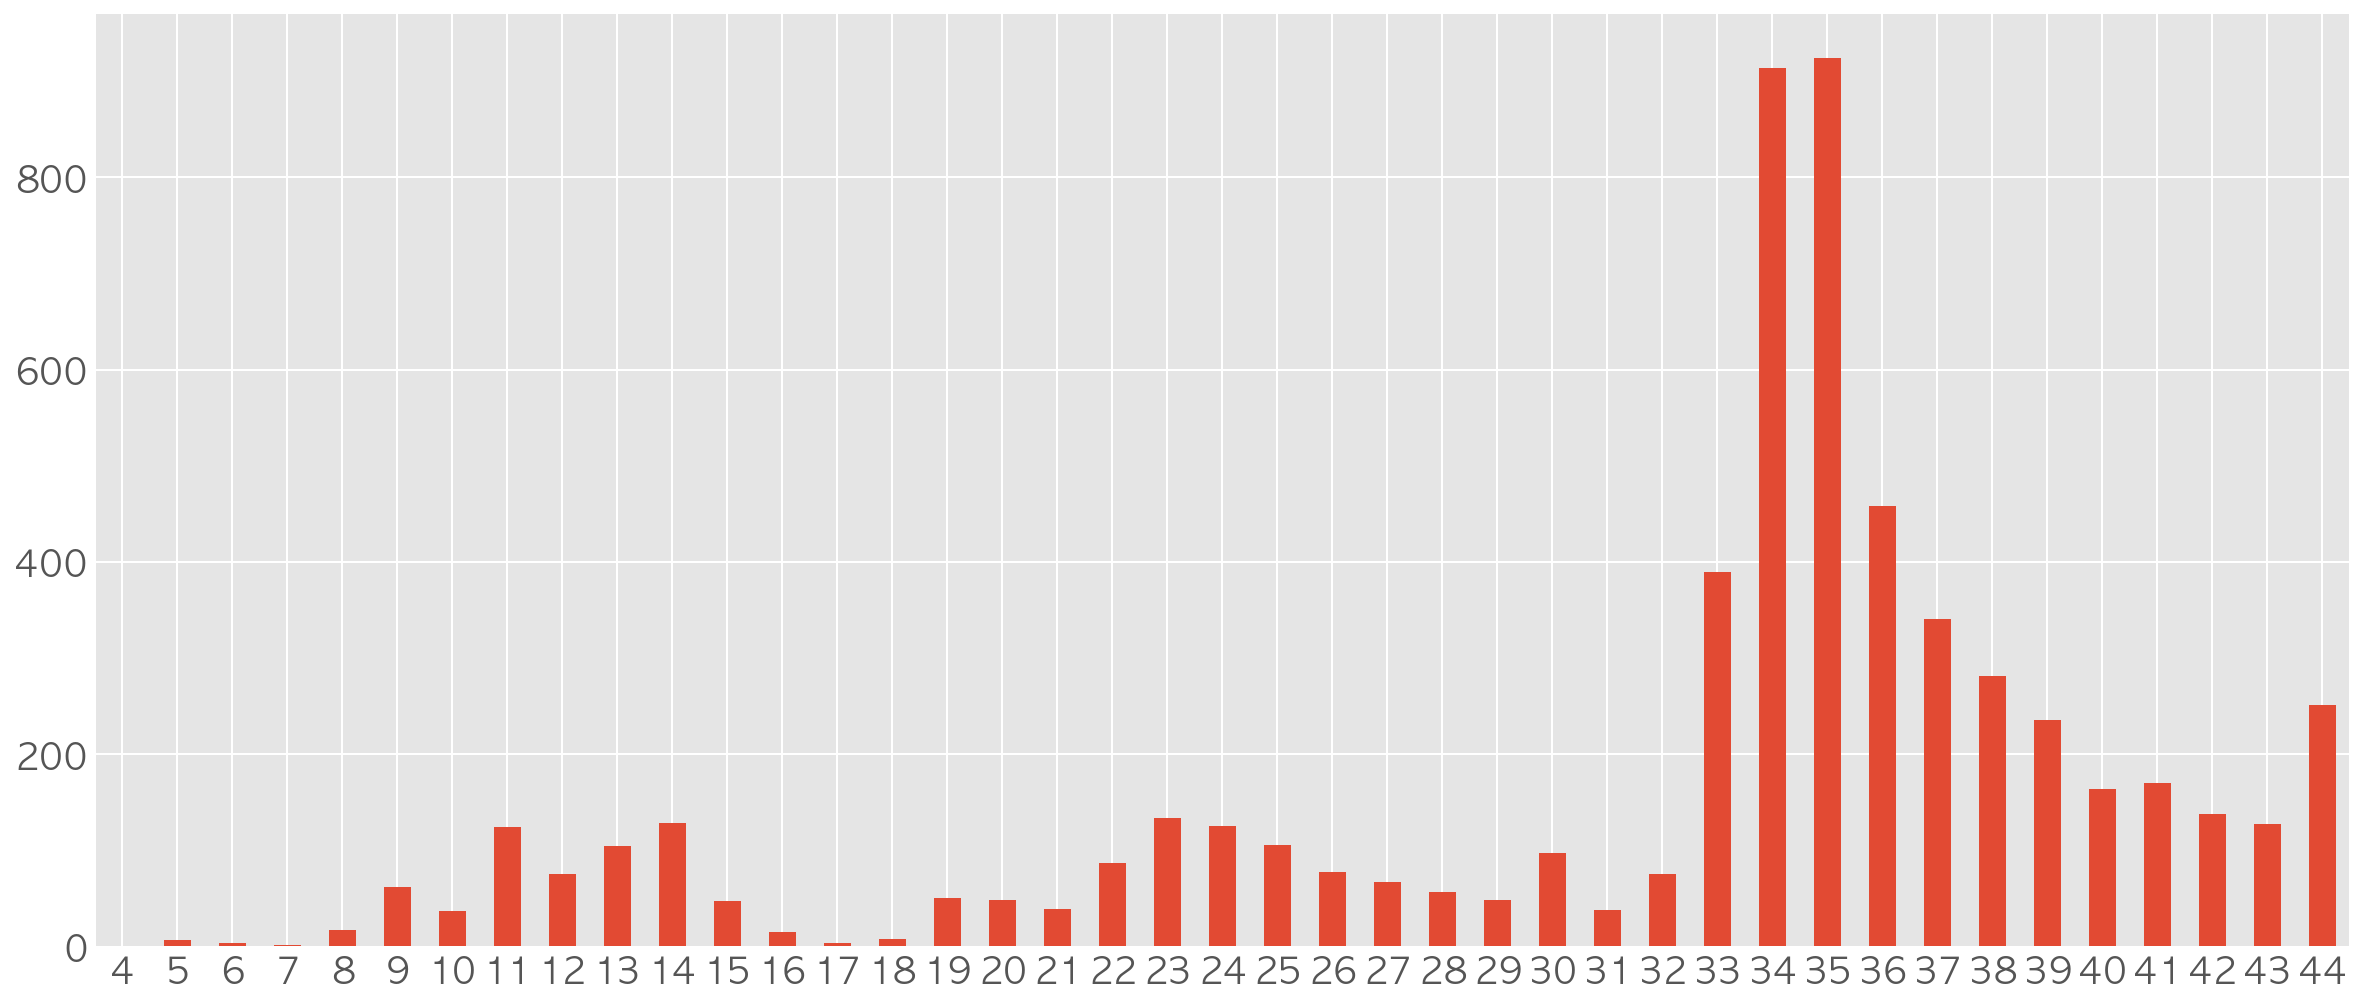

In [177]:
# 주차는 2020년의 몇번째 주인지 알려줌
d3=data['주차'].value_counts().sort_index()
d3.plot.bar(rot=0,figsize=(18,8))